In [1]:
# NAIVE BAYES LOGISTICS REGRESSION ON PIMA INDIANS FOR DIABETES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# render the plot inline, instead of seperate window
%matplotlib inline


In [2]:
df=pd.read_csv("pimaindiansdiabetes.csv")

In [3]:
#take a look at the shape
df.shape 

(768, 9)

In [6]:
# take a look at first and last few lines
df.head(5)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
# check for null values
df.isnull().values.any()

False

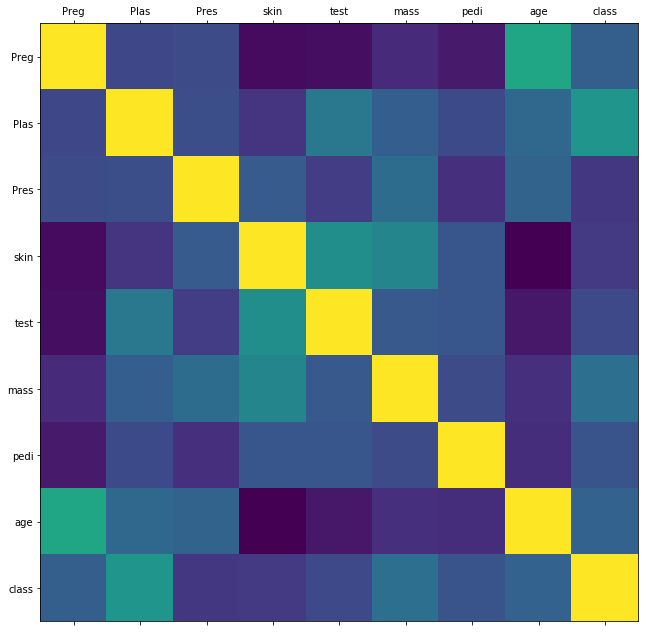

In [11]:
# check for correlated columns
def plot_corr(df,size=11):
    corr=df.corr()
    fig,ax= plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
plot_corr(df)

In [12]:
# looks like there are no columns having high correlation.
# check exact numbers for correlation
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
# since there are no columns having correlations, we cannot remove any columns now
# if in case we have 2 columns are highly correlated, we can remove one columns and do further processing

In [14]:
# Check data type for molding the data
df.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# all values are numeric, no string values. If there are string values, we must assign equivalent numeric values
# Since all values are numeric, no need to make any changes

# Check true / False ration
num_obs=len(df)
num_true=len(df.loc[df['class']==1])
num_false=len(df.loc[df['class']==0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))



Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [18]:
# Split the data
from sklearn.model_selection import train_test_split

feature_col_names = ['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']
predicted_class_names = ['class']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)
# 42 is the set.seed() equivalent in Python which generates repeatable random distribution


In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [21]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 1]), (len(df.loc[df['class'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 0]), (len(df.loc[df['class'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [22]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing Plas: {0}".format(len(df.loc[df['Plas'] == 0])))
print("# rows missing Pres: {0}".format(len(df.loc[df['Pres'] == 0])))
print("# rows missing skin: {0}".format(len(df.loc[df['skin'] == 0])))
print("# rows missing test: {0}".format(len(df.loc[df['test'] == 0])))
print("# rows missing mass: {0}".format(len(df.loc[df['mass'] == 0])))
print("# rows missing pedi: {0}".format(len(df.loc[df['pedi'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing Plas: 5
# rows missing Pres: 35
# rows missing skin: 227
# rows missing test: 374
# rows missing mass: 11
# rows missing pedi: 0
# rows missing age: 0


In [25]:
# impute with mean
from sklearn.preprocessing import Imputer

# For all readings == 0, impute with mean
fill_0 = Imputer(missing_values=0,strategy="mean",axis=0)

X_train= fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [26]:
# Train data with Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train.ravel())
GaussianNB(priors=None)

GaussianNB(priors=None)

In [27]:
# Test the Models accuracy with training data
nb_predict_train = nb_model.predict(X_train)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()

Accuracy: 0.7542



In [28]:
# Test the Models accuracy with testing data
nb_predict_test = nb_model.predict(X_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))
print()

Accuracy: 0.7359



In [29]:
# Check Confusion Matrix for Naive Bayes
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print("")

Confusion Matrix
[[118  33]
 [ 28  52]]



In [30]:
# Check the Classification Report for Naive Bayes
print("Classification Report")
print("{0}".format(metrics.classification_report(y_test,nb_predict_test)))

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



In [31]:
# Recall is 0.65 and Precision is 0.61. Hence the Naives Bayes Prediction done.